(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
   sepal length in cm    150 non-null float64
   sepal width in cm     150 non-null float64
   petal length in cm    149 non-null float64
  petal width in cm      149 non-null float64
SpeciesType              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
          sepal length in cm     sepal width in cm     petal length in cm  \
count             150.000000            150.000000             149.000000   
mean                5.843333              3.054000               3.759060   
std                 0.828066              0.433594               1.770365   
min                 4.300000              2.000000               1.000000   
25%                 5.100000              2.800000               1.600000   
50%                 5.800000              3.000000               4.400000   
75%                 6.400000              3.300000            

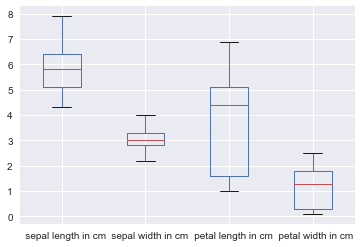

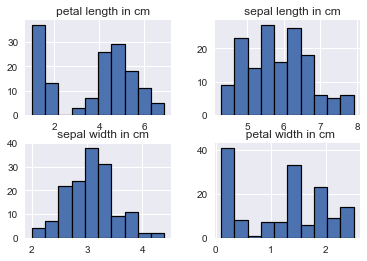

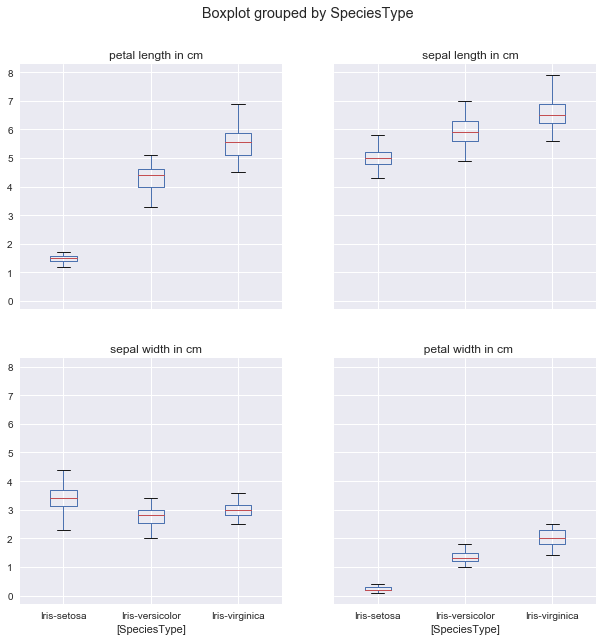

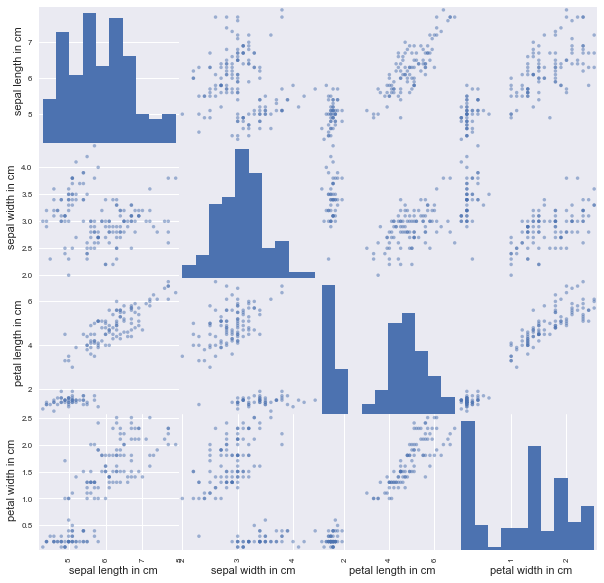

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.92      0.96        13
          2       0.86      1.00      0.92         6

avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
('accuracy is', 0.96666666666666667)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.96        13
          2       1.00      0.83      0.91         6

avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
('accuracy is', 0.96666666666666667)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
('accuracy 

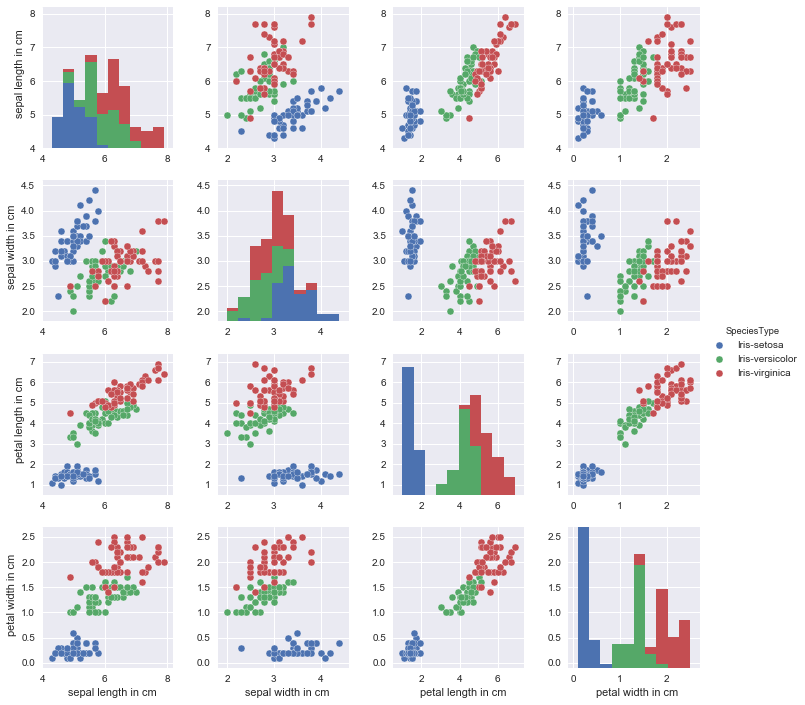

In [32]:
#importing the libraries
#3 essential library
#numpy constis of mathematical functions,
#matplotlib for plotting graphs and plots
#pandas for importing dataset and data managing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)


#import the dataset using pandas
dataset=pd.read_csv('Iris_data.csv')
dataset.head()

#Summary of the dataset
#Shape(gives number of rows and no.ofcolumns in the dataset)
print(dataset.shape)

#Info(gives datatype,constraints of each column in the dataset)
print(dataset.info())

#Descriptions(gives descriptive statistics like mean,min etc of each column)
print(dataset.describe())

#Class Dirtibution using GROUPBY(gives distribution of each type of classification over whole dataset)
print(dataset.groupby('SpeciesType').size())

#Visualizations:
#Box and Whisker Plots for all cloumns in the dataset
dataset.plot(kind='box' , sharex=False, sharey=False)

#Histograms
dataset.hist(edgecolor='black', linewidth=1.2)

#Boxplot on each feature split out by Class
dataset.boxplot(by="SpeciesType",figsize=(10,10))

#Scatter Plot Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(dataset,figsize=(10,10))
plt.show()

#bivariate relation between each pair of features using seaborn pairplot
sns.pairplot(dataset, hue="SpeciesType")

#importing metrics for evalutaions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#matrix of features,Independent variables(X)
X=dataset.iloc[:,:-1].values

X

#matrix of features,dependent variables(Y)
Y=dataset.iloc[:,4].values

Y

#replacing missing data using library imputer class from skleran 
#imputer replaces missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer=imputer.fit(X[:,2:4])
X[:,2:4]=imputer.transform(X[:,2:4])

X

#incase of dependent variable,only label encoder is sufficient and no need of onehotencoder as python will consider that they are dependent hence already in category
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
Y=labelencoder_Y.fit_transform(Y)

Y

#splitting the dataset into training and test set
#randon_state='num' always generate same results otherwise it will generate different result everytym
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#Models
#LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)

#predicting the test set results
y_pred=classifier.predict(X_test)

#Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_test,y_pred))

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_test,y_pred))

# Support Vector Machine's 
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_test,y_pred))


# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_test,y_pred))

# Decision Tree's
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,Y_test))

